# LINEAR REGRESSION FROM SCRATCH

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

## Reading and visualizing data

In [2]:
#importing data which contains profit of a  ike comapny in different cities and their population

data=pd.read_csv("bike_sharing_data.txt")
data

,Population,Profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [3]:
m=len(data.Population.values)
pop=data.Population.values  #x-axis coordinate
prof=data.Profit.values     #y-axis coordinate


#### *Visualising data*

Text(0, 0.5, 'Profit')

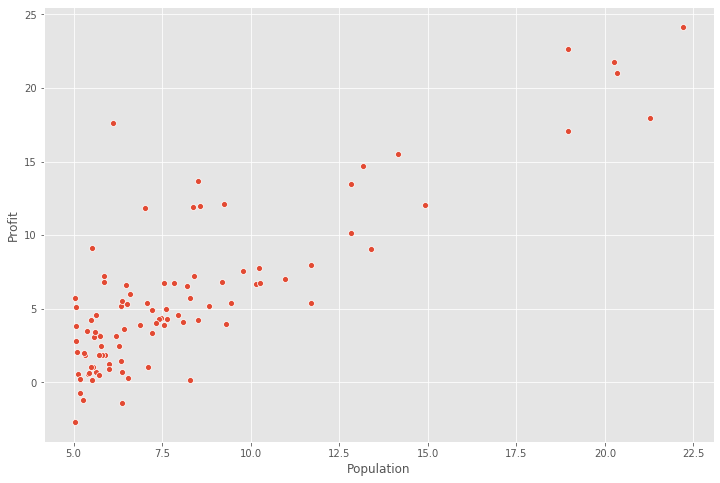

In [4]:
ax=sns.scatterplot(pop,prof)
plt.xlabel("Population")
plt.ylabel("Profit")

## Gradient Descent
### *Computing cost function and gradient descent*

In [5]:
def cost_function(x,y,theta):
    pred=x.dot(theta)
    error=(pred-y)**2
    return 1/(2*m)*np.sum(error)

In [6]:
def gradient_descent(x,y,theta,lrate,iterations):
    cost_h=np.zeros(iterations)
    theta_h=np.zeros((iterations,2))
    for i in range(iterations):
        pred=x.dot(theta)
        theta-=1/m*lrate*np.dot(x.T,(pred-y))
        theta_h[i,:]=(theta.T)
        cost_h[i]=cost_function(x,y,theta)
    return theta,theta_h,cost_h
    

In [7]:
#assigning values to parameters

X = np.c_[np.ones((m,1)),pop]
Y = prof.reshape(m,1)
theta=np.random.randn(2,1)
learning_rate=0.01
iterations=2000

In [8]:
theta,theta_history,cost_history=gradient_descent(X,Y,theta,learning_rate,iterations)

In [9]:
#coefficient of best fit graph formed
theta

array([[-3.7982816 ],
       [ 1.18323878]])

### Let's plot cost history vs iterations

We find that after series of iterations, we converge to a minimum value and the $J(\Theta)$ doesn't change.
We have attained minimum cost value and best fit graph for our predictions.

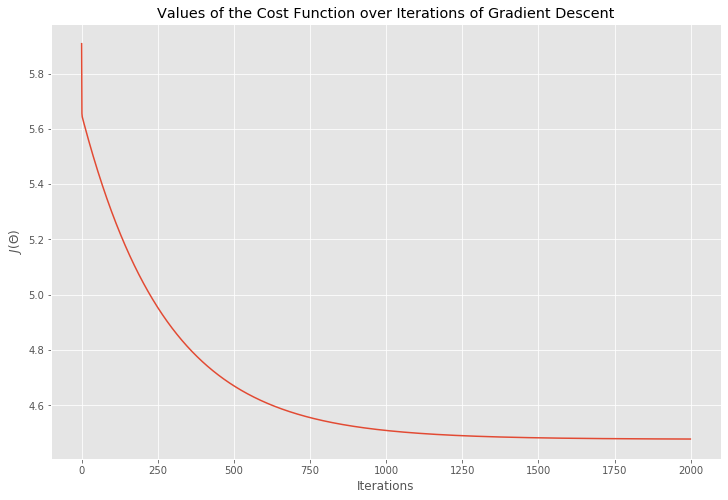

In [19]:
plt.plot(range(iterations),cost_history)
plt.ylabel("$J(\Theta)$")
plt.xlabel("Iterations")
plt.title("Values of the Cost Function over Iterations of Gradient Descent");

### Ploting Linear Regression Fit 

The best fit Linear line formed using Gradient Descent Method.
Red dots represent our data while the red line is the best fit line.

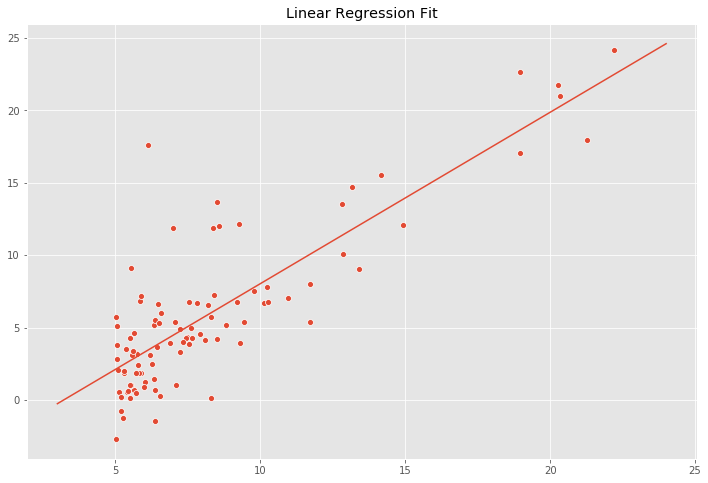

In [20]:
theta=np.squeeze(theta)
ax=sns.scatterplot(pop,prof)
x_value= [x for x in range(3,25)]
y_value= [(x*theta[1]+theta[0]) for x in x_value]
sns.lineplot(x_value, y_value)
plt.title("Linear Regression Fit");


In [12]:
def predict(x):
    x=np.append(1,x)
    y_pred=(x.dot(theta))
    return y_pred

In [13]:
predict([50])

55.3636576227217

### Scikit-Learn
 
 



In [14]:
from sklearn.linear_model import LinearRegression

In [21]:
#Get best fit graph using the LinearRegression method

reg=LinearRegression().fit(pop.reshape(m,1),prof.reshape(m,1))

### Ploting regression graph

Linear Regression Fit using sk-learn

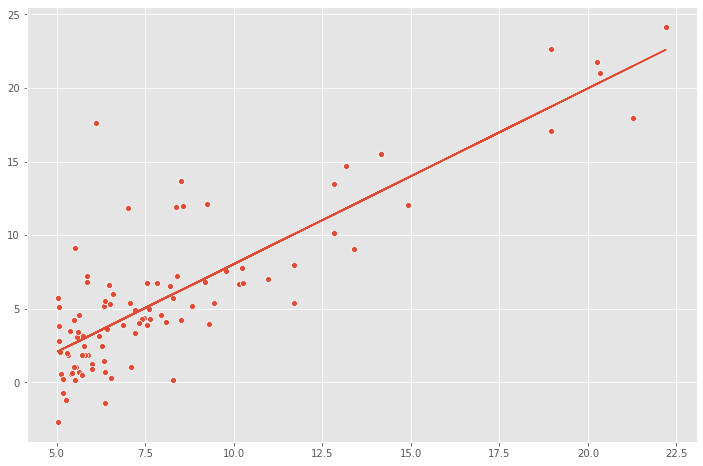

In [22]:
sns.scatterplot(pop,prof)
plt.plot(pop.reshape(m,1), reg.predict(pop.reshape(m,1)));

## _Comparsion with scikit's Learn Linear Regression_

In [17]:
population=50     # poplution at which profit is to be predicted

my_model=predict([population])
sk_model=reg.predict([[population]])

In [18]:
print("From scratch \n Predicted profit: ",my_model)
print("From sk-learn \n Predicted profit: ",sk_model[0][0])

From scratch 
 Predicted profit:  55.3636576227217
From sk-learn 
 Predicted profit:  55.75590133116784


## Applied Linear Regression from scratch to predict values. Also predicted the value using Scikit learn library.